# Final Project Submission <a class="tocSkip">

Please fill out:
* Student name: Marco Giuseppe Nasuto
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL: https://readymag.com/kosmonauts/action-eda/


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Get-statistics" data-toc-modified-id="Get-statistics-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Get statistics</a></span></li><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data wrangling</a></span><ul class="toc-item"><li><span><a href="#Minimum-number-of-observations" data-toc-modified-id="Minimum-number-of-observations-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Minimum number of observations</a></span></li><li><span><a href="#Before-removing-outliers" data-toc-modified-id="Before-removing-outliers-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Before removing outliers</a></span><ul class="toc-item"><li><span><a href="#Drop-NaN-values" data-toc-modified-id="Drop-NaN-values-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Drop NaN values</a></span></li><li><span><a href="#Prepare-for-two-models:--by-two-genres/macrogenres-and--by-single-genre" data-toc-modified-id="Prepare-for-two-models:--by-two-genres/macrogenres-and--by-single-genre-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>Prepare for two models:  by two-genres/macrogenres and  by single-genre</a></span></li><li><span><a href="#Model-1:-Two-genres" data-toc-modified-id="Model-1:-Two-genres-1.4.2.3"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>Model 1: Two-genres</a></span></li><li><span><a href="#Model-2:-Single-genre" data-toc-modified-id="Model-2:-Single-genre-1.4.2.4"><span class="toc-item-num">1.4.2.4&nbsp;&nbsp;</span>Model 2: Single-genre</a></span></li></ul></li><li><span><a href="#Removing-outliers" data-toc-modified-id="Removing-outliers-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Removing outliers</a></span></li><li><span><a href="#Prepare-dataframes-for-best-cast-analysis" data-toc-modified-id="Prepare-dataframes-for-best-cast-analysis-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Prepare dataframes for best cast analysis</a></span></li><li><span><a href="#Export-to-csv" data-toc-modified-id="Export-to-csv-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Export to csv</a></span></li></ul></li></ul></li></ul></div>

## Data Cleaning

We have gathered and parsed our data into dataframes. Now we need to do prepare our data for Exploratory Data Analysis (EDA). To do so, we do some data cleaning:
1. Get statistics: first we need to assess our dataset, get a picture on what data is stored, get basic statistics and information. We will use an ad hoc function called `statistics`
2. Data wrangling: 
    1. Applying data cleaning techniques in order to handle:
        . Inconsistencies in data
        . Misspelled text data
        . Outliers
        . Imbalanced data
        . Invalid/outdated data
        . Missing data
   
   2. Structuring and enriching data into a desired format for better decision making in less time

### Import libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
%matplotlib inline

In [101]:
def statistics(df):
    '''The fucntion returns a set of general statistics and information on a given dataframe df:
    - .shape: shape of the dataframe
    - .info: dtype objects of each column and number of non-null objects
    - .describe: count, mean, std,  min, max, quartiles
    - .median: median of numerical columns in dataframe
    - (isna.sum, perc_NaN): number of NaN values for each column and percentage of Nan values w.r.t each column total number of rows
    - (.duplicated, index_dupl): tuple with number of rows duplicated and indexes where .duplicated == True
    - .value_counts: Normalized unique values for each column in dataframe
    - .columns: list of columns of the dataframe
    - boxplot: boxplots of numerical columns
    - hist: histograms of numerical columns
    - scatterplot: scatter plot for numerical columns
\nParameters
----------
\ndf : DataFrame object
    '''
    duplicated_index = df[df.duplicated()].index
    print('Shape: ', df.shape)
    print('\n')
    print('dtype objects of each column and number of non-null objects:')
    print('\n')
    print(df.info())
    print('\n')
    print('count, mean, std, min, max, quartiles:')
    print('\n')
    print(df.describe())
    print('\n')
    print('Median values of numerical columns in the dataframe:')
    print('\n')
    print(df.median())
    print('\n')
    print('Number of NaN values per column:')
    print('\n')
    print(df.isna().sum(), '\n\nIn terms of percentage (%) for each column\n\n', df.apply(lambda x: ((x.isna().sum())/len(x))*100 ))
    print('\nNormalized unique values for each column in dataframe')
    for col in df.columns:
        if df[col].dtypes == np.number:
            print('\nColumn name: {}\n\n{}'.format(col,df[col].value_counts(normalize=True, dropna=False)))
        else:
            print('\nColumn name: {}\n\n{}'.format(col,df[col].value_counts(normalize=True, dropna=False)))
    print('Duplicated rows in the dataframe: ', df.duplicated().sum(), 'Indexes where duplicated', duplicated_index)
    print('List of columns in the dataframe:')
    print(df.columns)
    print('\n')
    try: 
        df.boxplot(figsize=(19,9))
        plt.title('Boxplots and histograms of numerical columns')
        df.hist(figsize=(19,9))
    except: 
        print('No numerical columns')
    return duplicated_index

In [102]:
def min_num_observations(df, year):
    '''This fucntion returns the total number of observations and the minimum number of observations (1% criterion) for a specific year. Dataframe df must have the columns 'macrogenres' and 'year'
\nParameters
----------
\ndf : DataFrame object
\nyear : float or int, year'''
    observations = df[df['year'] == year]['macrogenres'].value_counts().sum()
    prc_observations = round(observations / 100, 2)
    print('Total number of films produced in {}: {} \nMinimum number of observation (1% criterion) for {}: {}'.format(year,observations,year,prc_observations))
    min_num = [observations, prc_observations]
    return min_num

In [103]:
def get_plot(df, kind, title, hue=False, singleGenre=False, genre='Action'):
    '''This function returns a horizontal boxplot, barplot or stripplot of the `profit-per-budget` column of a dataframe df
\nParameters
----------
\ndf : Dataframe object with columns `profit-per-budget`, `genres`, `macrogenres` (optional)
\nkind : str, 'boxplot', 'barplot', 'stripplot' | `boxplot` returns a boxplot
                                                `barplot` returns a barplot
                                                `stripplot` returns a strip plot
\ntitle : str, title of the plot
\nhue : bool, default False | when True, only applicable for boxplot and dataframe with both `genres` and `macrogenres` columns
\nsingleGenre: bool, default False | when True, the funtcion returns a plot of type `kind` for a single genre `*genre` throughout years
\ngenre: str, default 'Action' | column name of the genre you want to get the plots for'''
    fig, ax = plt.subplots(figsize=(15,9), dpi=300)
    if  singleGenre:
        if kind == 'boxplot':
            sns.boxplot(x='year', y='profit-per-budget', data=df[df['genres'] == genre], dodge=False)
        elif kind == 'stripplot':
            sns.stripplot(x='year', y='profit-per-budget', data=df[df['genres'] == genre], dodge=False)
        elif kind == 'barplot':
            sns.barplot(x='year', y='profit-per-budget', data=df[df['genres'] == genre], dodge=False)

        ax.axhline(1, ls='--', color='r')
        ax.set_title('{} Profitability of {} Films from 2014 to 2020 - After Modified Z-score Filter'.format(kind.title(), genre.title()));    

    else:
        if kind == 'boxplot':
            if hue == True:
                sns.boxplot(x='profit-per-budget', y='genres',hue='macrogenres', data=df.sort_values(by='macrogenres'), dodge=False)
            else:
                sns.boxplot(x='profit-per-budget', y='genres', data=df.sort_values(by='genres'), dodge=False)
        elif kind == 'barplot':
            if hue == True:
                sns.barplot(x='profit-per-budget', y='genres',hue='macrogenres', data=df.sort_values(by='macrogenres'), dodge=False, errwidth=True)
            else: 
                sns.barplot(x='profit-per-budget', y='genres', data=df.sort_values(by='genres'), dodge=False, errwidth=True)
        else:
            if hue == True:
                sns.stripplot(x='profit-per-budget', y='genres',hue='macrogenres', data=df.sort_values(by='macrogenres'), dodge=False)
            else:
                sns.stripplot(x='profit-per-budget', y='genres', data=df.sort_values(by='genres'), dodge=False)

        ax.axvline(1, ls='--', color='r')
        ax.set_title('{}'.format(title));
 

In [104]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    The modified z score might be more robust than the standard z score because it relies on the median for calculating the z score. It is less influenced by outliers when compared to the standard z score.
    The standard z score is calculated by dividing the difference from the mean by the standard deviation. The modified z score is calculated from the mean absolute deviation (MeanAD) or median absolute deviation (MAD). These values must be multiplied by a constant to approximate the standard deviation.
    Depending on the value of MAD, the modified z score is calculated in one of two ways:
    MAD does equal 0. Subtract the median from the score and divide by 1.253314*MeanAD. 1.253314*MeanAD approximately equals the standard deviation: (X-MED)/(1.253314*MeanAD).
    If MAD does not equal 0. Subtract the median from the score and divide by 1.486*MAD: (X-MED)/(1.486*MAD). 1.486*MAD approximately equals the standard deviation.
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

### Load data

In [105]:
scraped = pd.read_csv('external/films_scraped.csv')

### Get statistics

We define a function called statistics to retrieve some useful metadata and plots in one shot.

Shape:  (4607, 12)


dtype objects of each column and number of non-null objects:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 12 columns):
directors          4607 non-null object
actors             4607 non-null object
writers            4607 non-null object
producers          4607 non-null object
year               4607 non-null int64
genres             3788 non-null object
certificates       3788 non-null object
duration           3788 non-null object
Budget             1513 non-null float64
Gross US           4438 non-null float64
Gross Worldwide    4607 non-null float64
titles             4607 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 432.0+ KB
None


count, mean, std, min, max, quartiles:


              year        Budget      Gross US  Gross Worldwide
count  4607.000000  1.513000e+03  4.438000e+03     4.607000e+03
mean   2016.559366  3.582308e+07  1.804268e+07     4.842965e+07
std       1.693742  5.1

Int64Index([], dtype='int64')

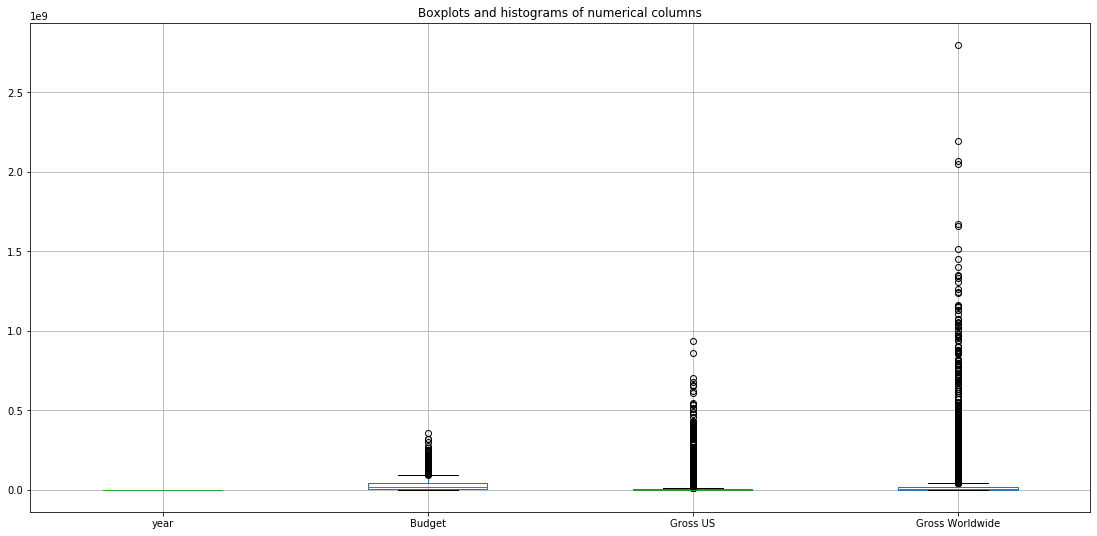

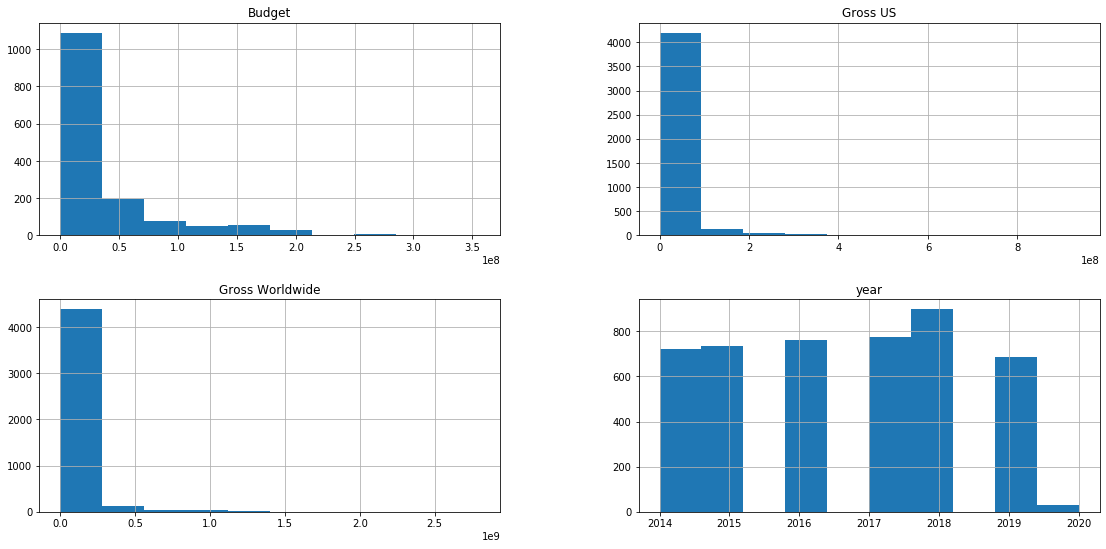

In [106]:
statistics(scraped)

### Data wrangling

#### Minimum number of observations

First, we need to determine the minimum number of observations required to do any reliable analysis. Unfortunately, after several researches in literature, the calculation for finite-size populations is complex and an on-going topic of research. 

For simplicity, we will define a rule of thumb:
- Minimum number of observations (excluding 2020): 1% of the population ~ 46 films

`len(scraped[scraped['year'] != 2020]) = 4575`

Let's check how many films for years we have from the original dataframe `scraped`

In [107]:
copy_scraped = scraped.copy()

In [108]:
#edit 'genres' column so to transform multiple genres from string to list of string objects
copy_scraped['genres'] = copy_scraped.genres.apply(lambda x: str(x).split(','))
copy_2genres = copy_scraped

#modify genre column with only the first two genre for each film
copy_2genres['genres'] = copy_2genres.genres.apply(lambda x: x[:2])
#create a column 'len-genres' so to split films with only 1 genre and films with 2 genres
copy_2genres['len-genres'] = copy_2genres['genres'].apply(lambda x: len(x))

#create a temporary data frame where categorising films by number of categories
copy_2genres_len1 = copy_2genres[copy_2genres['len-genres'] < 2]
copy_2genres_len2 = copy_2genres[copy_2genres['len-genres'] >= 2]

#set macrocategory of film like category
copy_2genres_len1['macrogenres'] = copy_2genres_len1.genres.apply(lambda x: x[0])
copy_2genres_len1.loc[:,'genres'] = copy_2genres_len1.genres.apply(lambda x: x[0])

#set macrocategory of film like the first category of each film
copy_2genres_len2['macrogenres'] = copy_2genres['genres'].apply(lambda x: x[0])
copy_2genres_len2['genres'] = copy_2genres['genres'].apply(lambda x: x[0] + ' ' + x[-1])

#concatenate temporary datasets
copy_full = pd.concat([copy_2genres_len1, copy_2genres_len2])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [109]:
min_num2014 = min_num_observations(copy_full, 2014)

Total number of films produced in 2014: 721 
Minimum number of observation (1% criterion) for 2014: 7.21


In [110]:
min_num2015 = min_num_observations(copy_full, 2015)

Total number of films produced in 2015: 734 
Minimum number of observation (1% criterion) for 2015: 7.34


In [111]:
min_num2016 = min_num_observations(copy_full, 2016)

Total number of films produced in 2016: 761 
Minimum number of observation (1% criterion) for 2016: 7.61


In [112]:
min_num2017 = min_num_observations(copy_full, 2017)

Total number of films produced in 2017: 777 
Minimum number of observation (1% criterion) for 2017: 7.77


In [113]:
min_num2018 = min_num_observations(copy_full, 2018)

Total number of films produced in 2018: 898 
Minimum number of observation (1% criterion) for 2018: 8.98


In [114]:
min_num2019 = min_num_observations(copy_full, 2019)

Total number of films produced in 2019: 684 
Minimum number of observation (1% criterion) for 2019: 6.84


#### Before removing outliers

##### Drop NaN values

In [115]:
#drop NaN for fimlms without Budget
df_work = scraped.dropna(subset=['Budget'])

#drop rows for films with NaN in genres, certificates, duration
df_work = df_work.dropna(subset=['genres'])
df_work.isna().sum()

directors           0
actors              0
writers             0
producers           0
year                0
genres              0
certificates        0
duration            0
Budget              0
Gross US           21
Gross Worldwide     0
titles              0
dtype: int64

In [116]:
df_work.shape

(1458, 12)

##### Prepare for two models:  by two-genres/macrogenres and  by single-genre

In [117]:
#fix duration formatting
df_work['duration'] = df_work.duration.apply(lambda x: float(x.split(' ')[1]))

In [118]:
#create columns 'Profits' and 'profit-per-Budget' aka ROI
df_work['Profits'] = df_work['Gross Worldwide'] - df_work['Budget']
df_work['profit-per-length'] = df_work['Profits'] / df_work.duration
df_work['profit-per-budget'] = df_work['Profits'] /df_work.Budget

In [119]:
#edit 'genres' column so to transform multiple genres from string to list of string objects
df_work['genres'] = df_work.genres.apply(lambda x: x.split(','))
df_work2genres = df_work

#modify genre column with only the first two genre for each film
df_work2genres['genres'] = df_work2genres.genres.apply(lambda x: x[:2])
#create a column 'len-genres' so to split films with only 1 genre and films with 2 genres
df_work2genres['len-genres'] = df_work2genres['genres'].apply(lambda x: len(x))

#create a temporary data frame where categorising films by number of categories
df_work2genres_len1 = df_work2genres[df_work2genres['len-genres'] < 2]
df_work2genres_len2 = df_work2genres[df_work2genres['len-genres'] >= 2]

#set macrocategory of film like category
df_work2genres_len1['macrogenres'] = df_work2genres_len1.genres.apply(lambda x: x[0])
df_work2genres_len1.loc[:,'genres'] = df_work2genres_len1.genres.apply(lambda x: x[0])

#set macrocategory of film like the first category of each film
df_work2genres_len2['macrogenres'] = df_work2genres['genres'].apply(lambda x: x[0])
df_work2genres_len2['genres'] = df_work2genres['genres'].apply(lambda x: x[0] + ' ' + x[-1])

#concatenate temporary datasets
df_workfull = pd.concat([df_work2genres_len1, df_work2genres_len2])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

##### Model 1: Two-genres

###### Filter by minimum number of observations

Let's begin from **two-genres classification** and see how many observations we have for each two-genres.

In [120]:
df_workfull['genres'].value_counts()

Action  Adventure       162
Comedy  Drama           124
Biography  Drama        102
Animation  Adventure     72
Action  Crime            65
                       ... 
Documentary  Sport        1
Documentary  News         1
Adventure  Sci-Fi         1
Comedy  Western           1
Romance                   1
Name: genres, Length: 91, dtype: int64

There are lots genres that have only 1 observation. We need to filter out all the genres that contain less than 46 films.

In [121]:
df_bygenre = df_workfull.groupby('genres').count()
filter_out = df_bygenre[df_bygenre['directors'] < 46].index

Now we filter our dataframe `df_workfull` from all the genres that don't match our minimum-number-of-observations criterion, using the list `filter_out`

In [122]:
df_workfull = df_workfull[~df_workfull['genres'].isin(filter_out)]

###### Plots

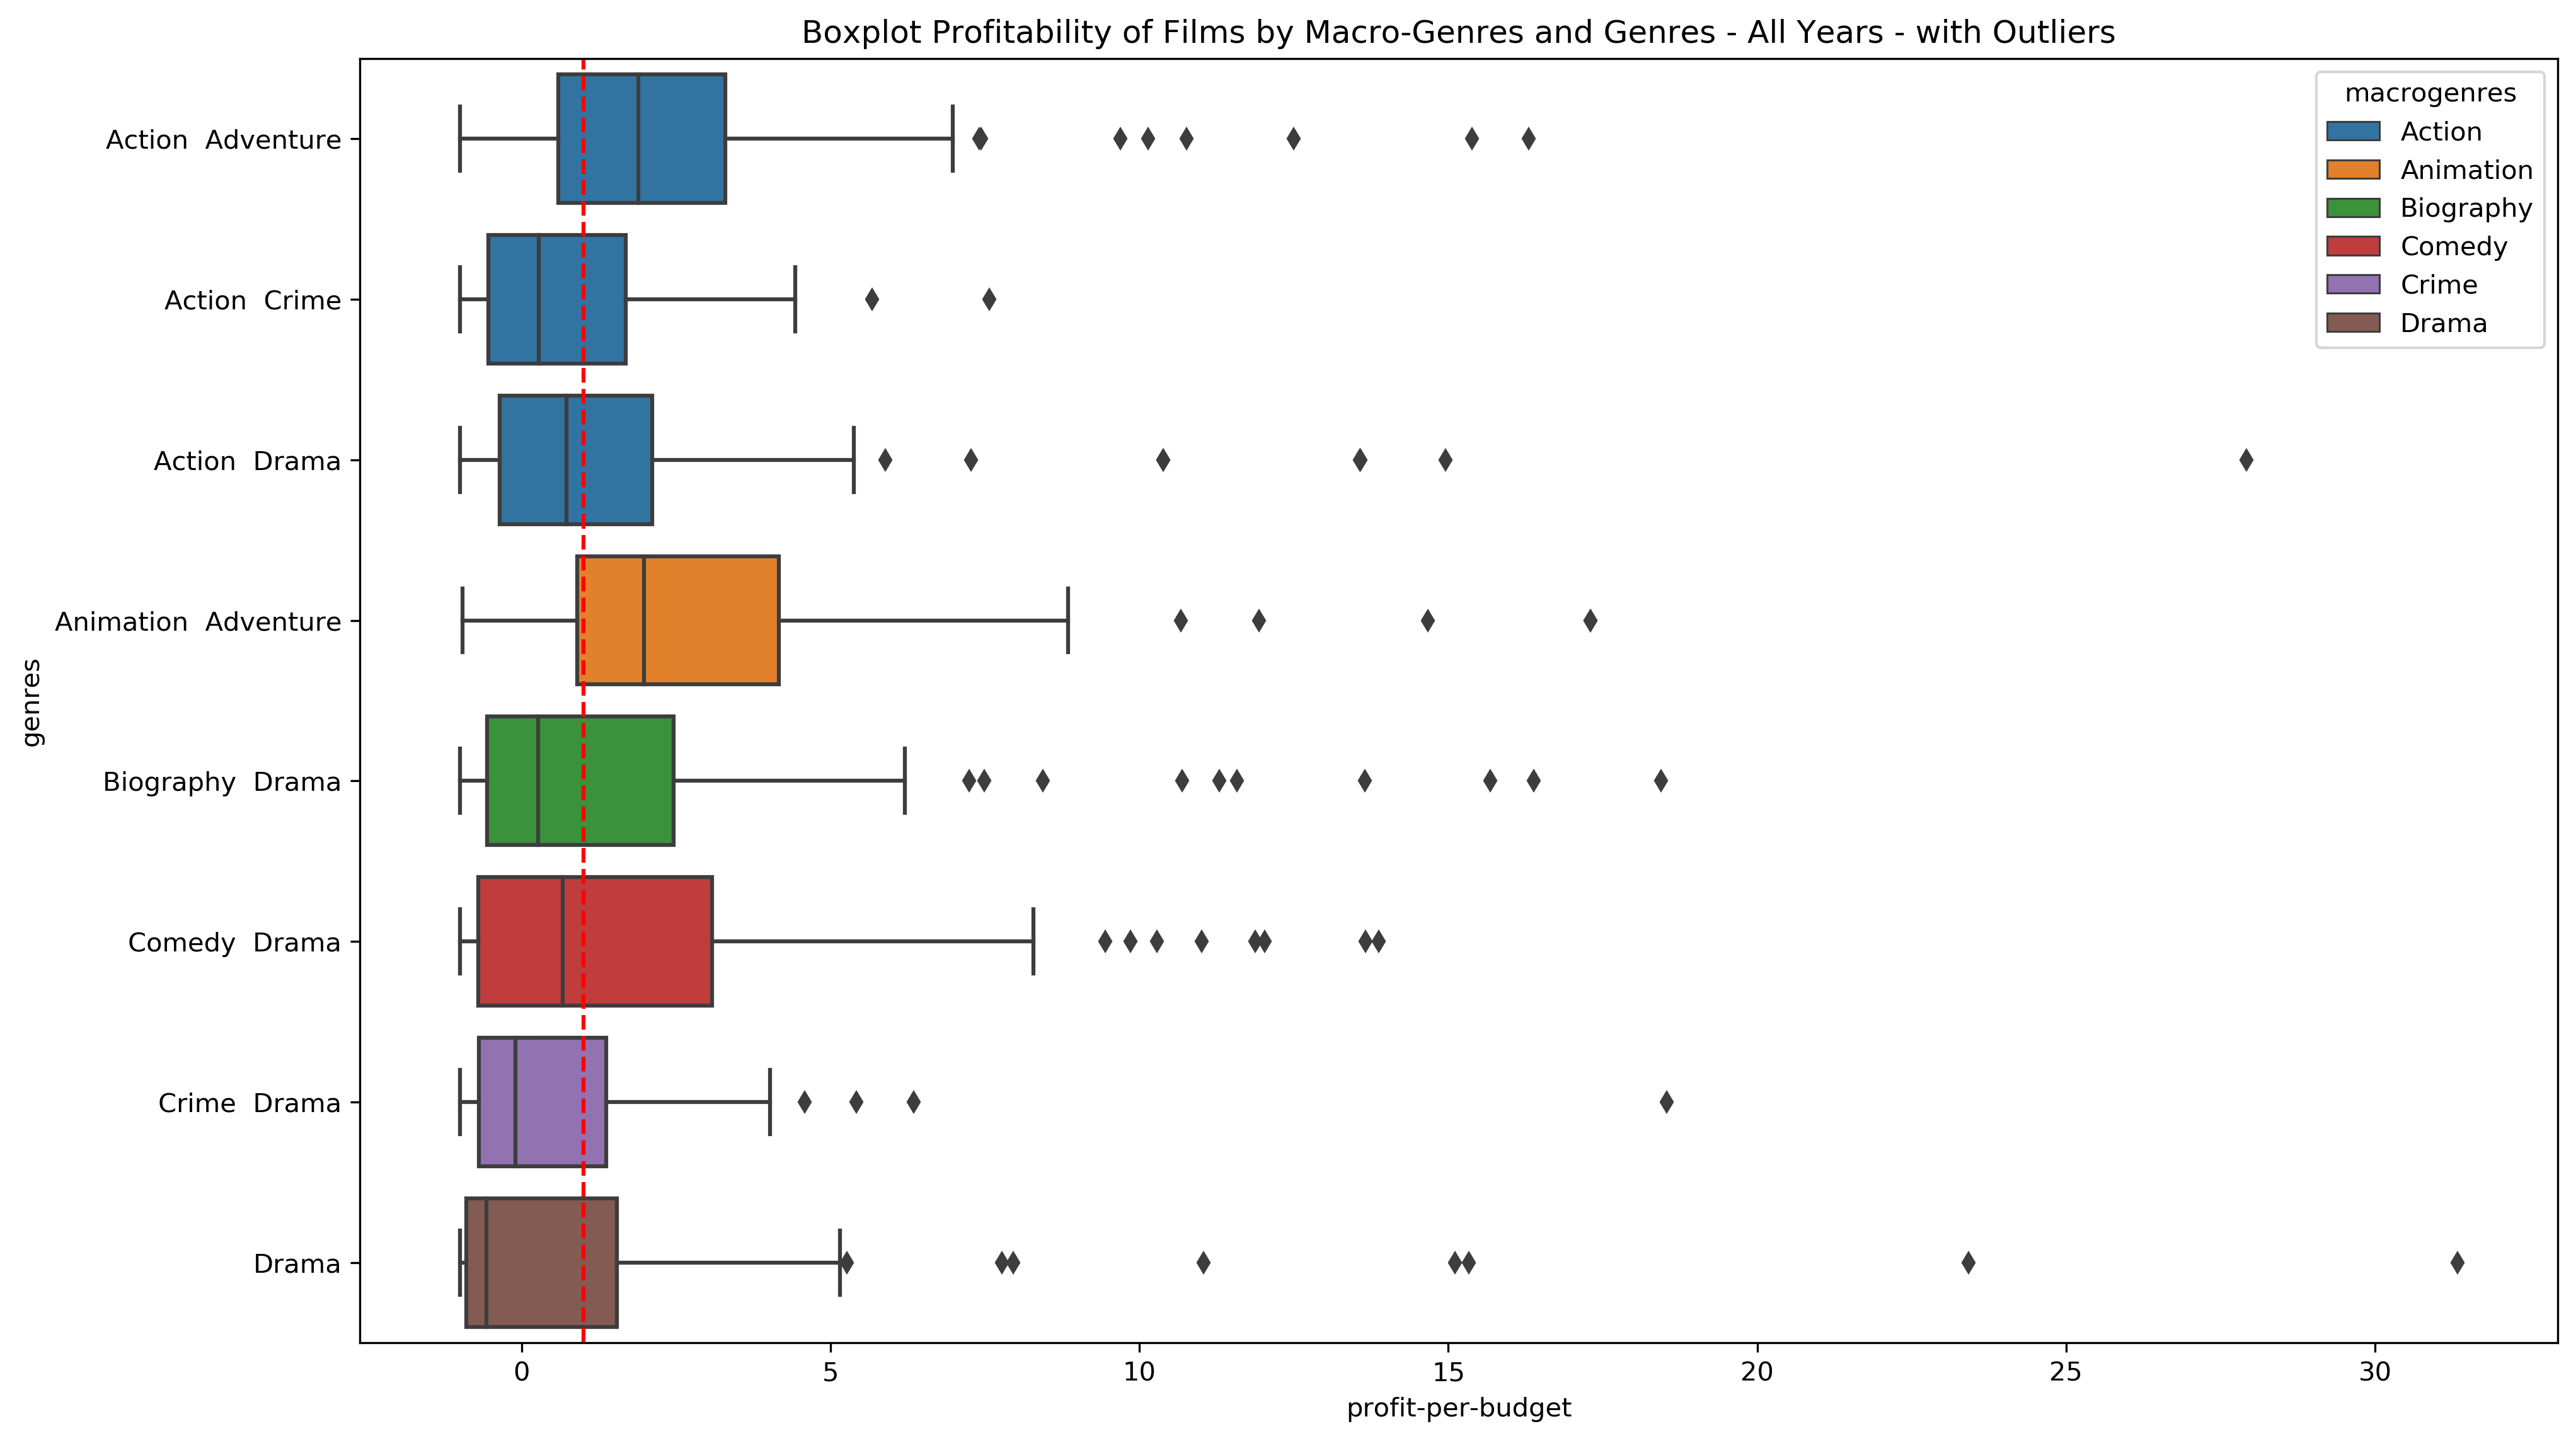

In [123]:
title = 'Boxplot Profitability of Films by Macro-Genres and Genres - All Years - with Outliers'
get_plot(df_workfull, 'boxplot', title, hue=True)

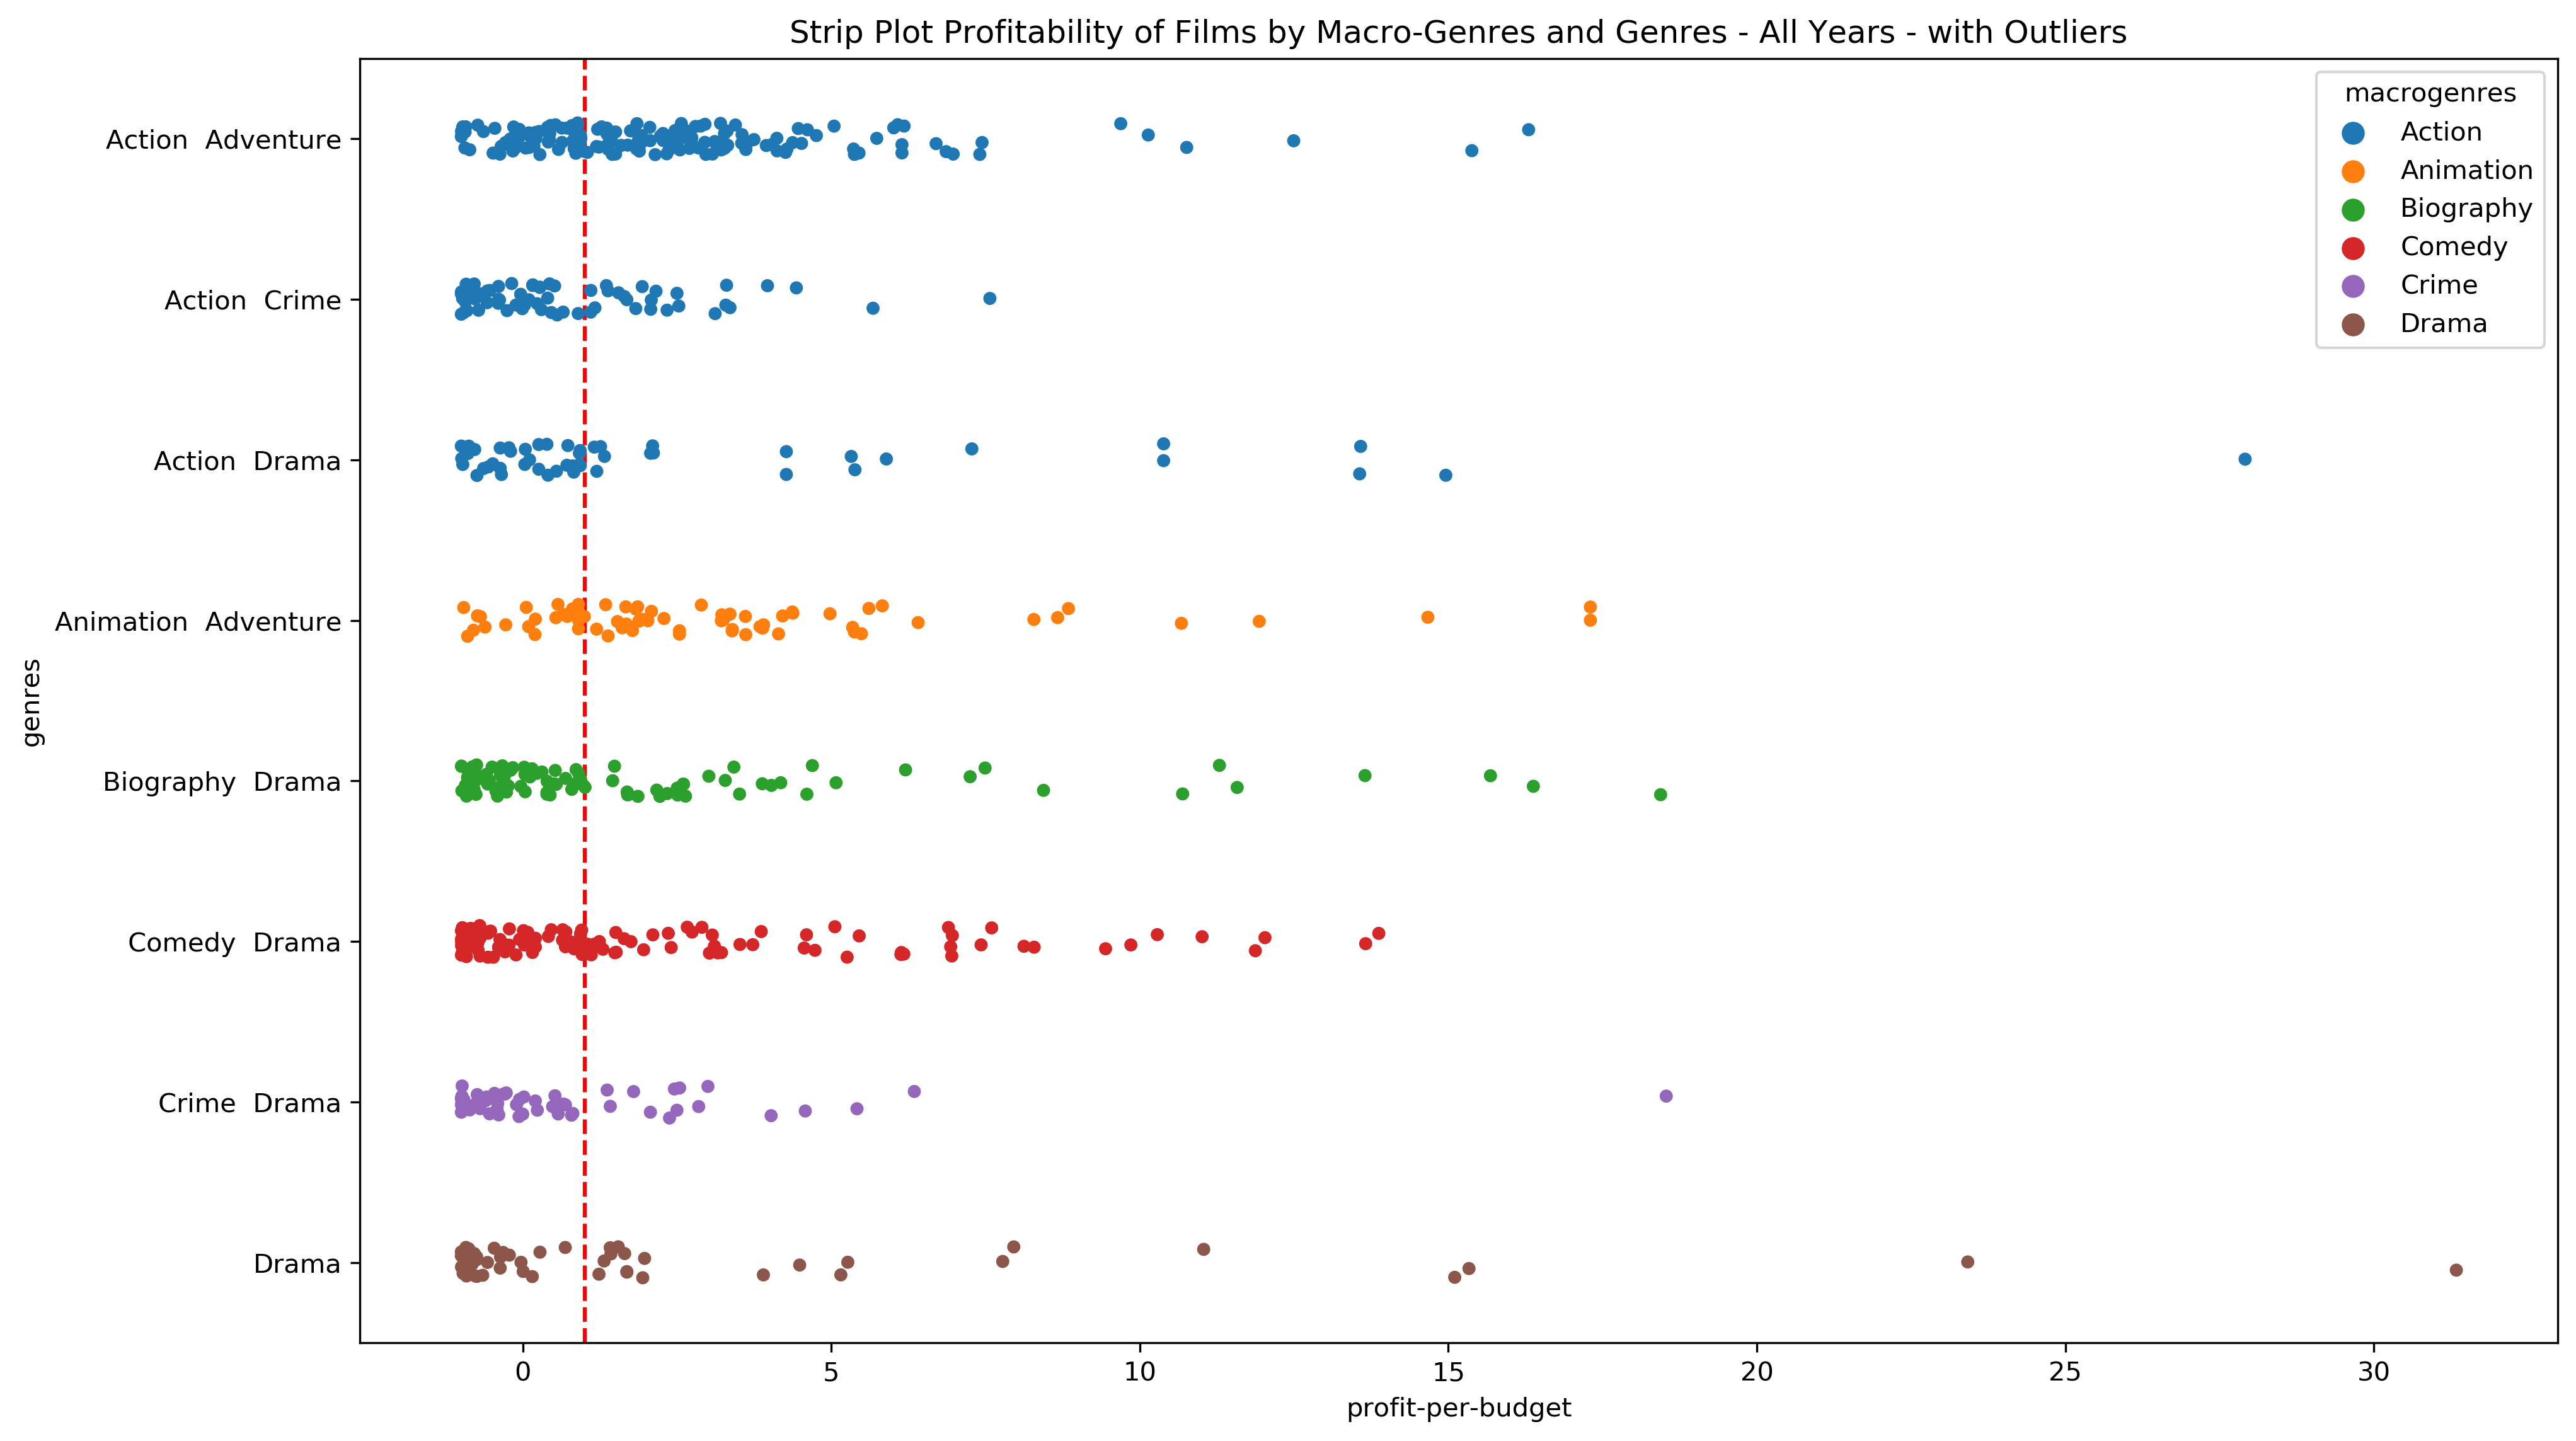

In [124]:
title = 'Strip Plot Profitability of Films by Macro-Genres and Genres - All Years - with Outliers'
get_plot(df_workfull, 'stripplot', title, hue=True)

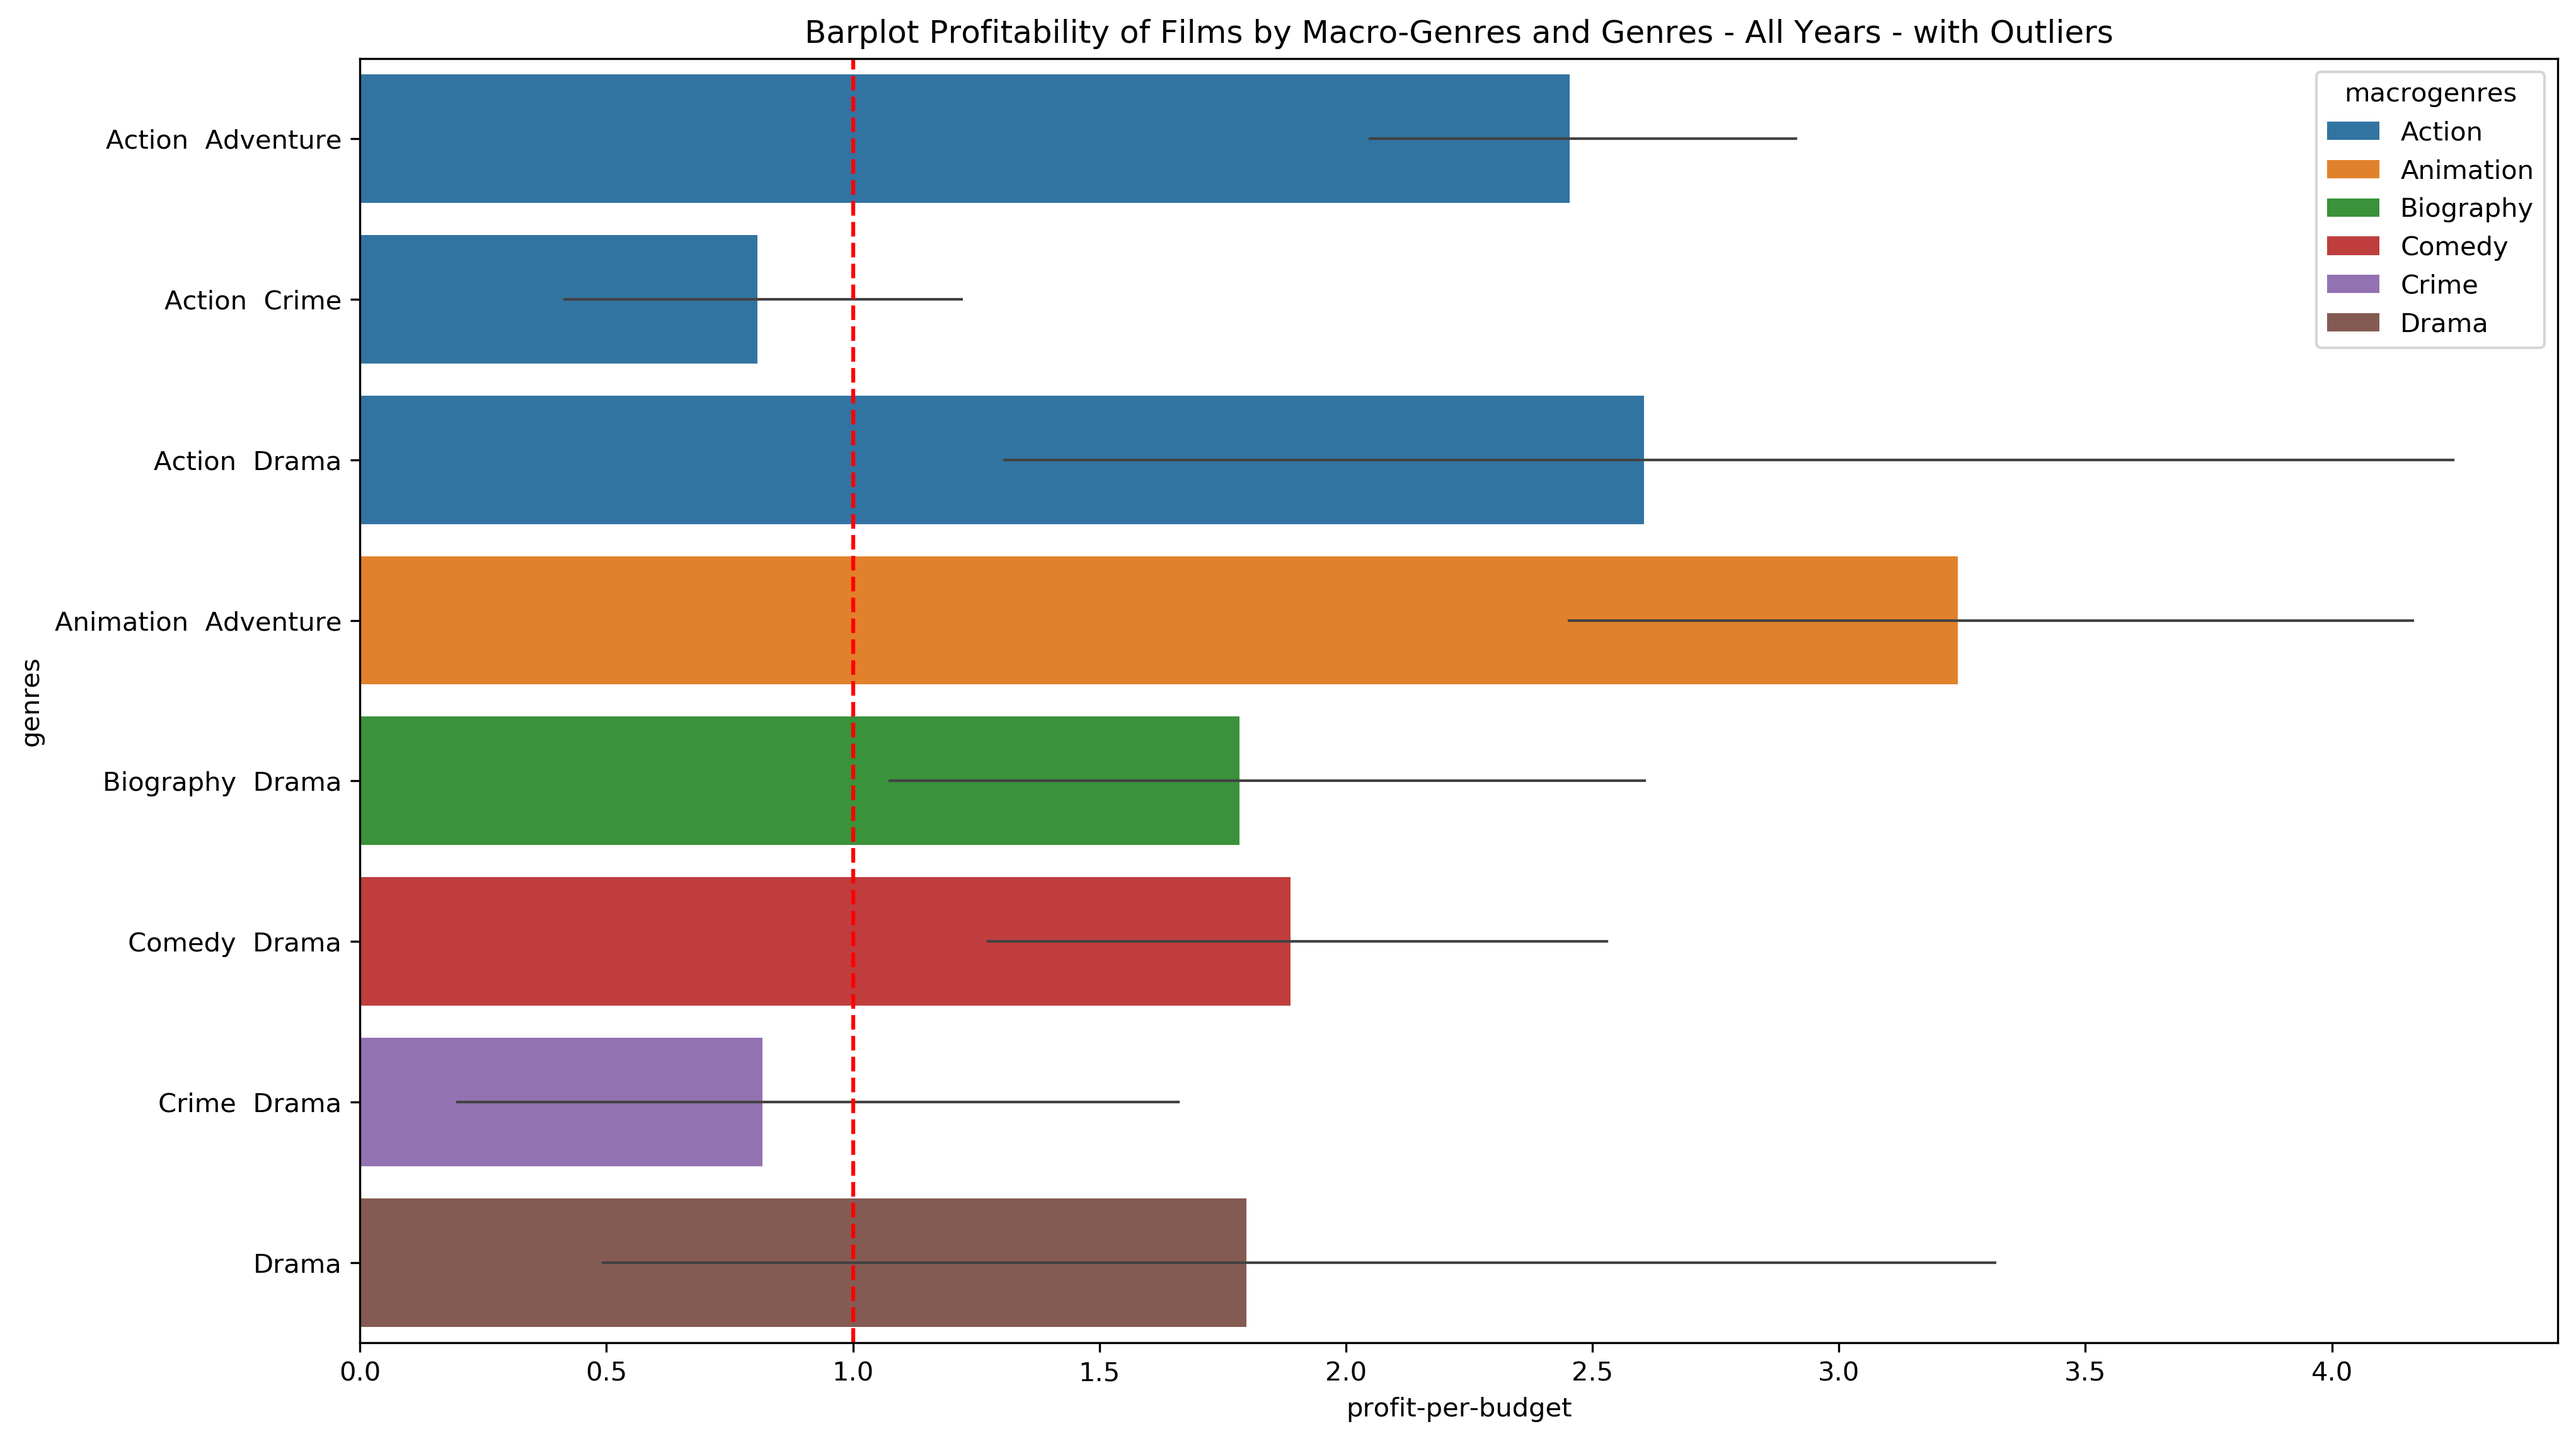

In [125]:
title = 'Barplot Profitability of Films by Macro-Genres and Genres - All Years - with Outliers'
get_plot(df_workfull, 'barplot', title, hue=True)

###### Export to csv

In [126]:
df_workfull.to_csv('processed/two-genres-films-no-outliers.csv')

##### Model 2: Single-genre

###### Filter and clean by minimum number of observations

In [127]:
#by single genre
df_workexp = df_work.explode('genres')

Let's check how many observations (films) per genre we have:

In [128]:
df_workexp['genres'].value_counts()

Action         380
 Drama         361
Drama          269
Comedy         252
 Adventure     237
Biography      134
Animation      108
 Crime         104
 Comedy         94
Horror          83
Adventure       82
 Mystery        73
 Romance        71
Crime           64
Documentary     63
 Thriller       62
 Horror         52
 Fantasy        45
 Family         45
 Biography      27
 Sci-Fi         25
 History        24
 Music          24
 Action         22
 Sport          10
 War            10
Musical          5
 Western         5
Family           4
Mystery          3
Thriller         3
Fantasy          3
Sci-Fi           2
Romance          2
 Musical         2
 Film-Noir       1
 News            1
Film-Noir        1
Name: genres, dtype: int64

There are a lot of genres with very few films. We need, as done before, to filter out all the genres with number of observations < 46:

In [129]:
df_bygenre = df_workexp.groupby('genres').count()
filter_out = df_bygenre[df_bygenre['directors'] < 46].index

Now we filter our dataframe `df_workexp` from all the genres that don't match our minimum-number-of-observations criterion, using the list `filter_out`

In [130]:
df_workexp = df_workexp[~df_workexp['genres'].isin(filter_out)]

Now we need to drop duplicates by title:

In [131]:
#drop duplicates by title = get only the firt macrogenre for each title
df_workexp_noduplicates = df_workexp.drop_duplicates(subset=['titles'])

###### Plots

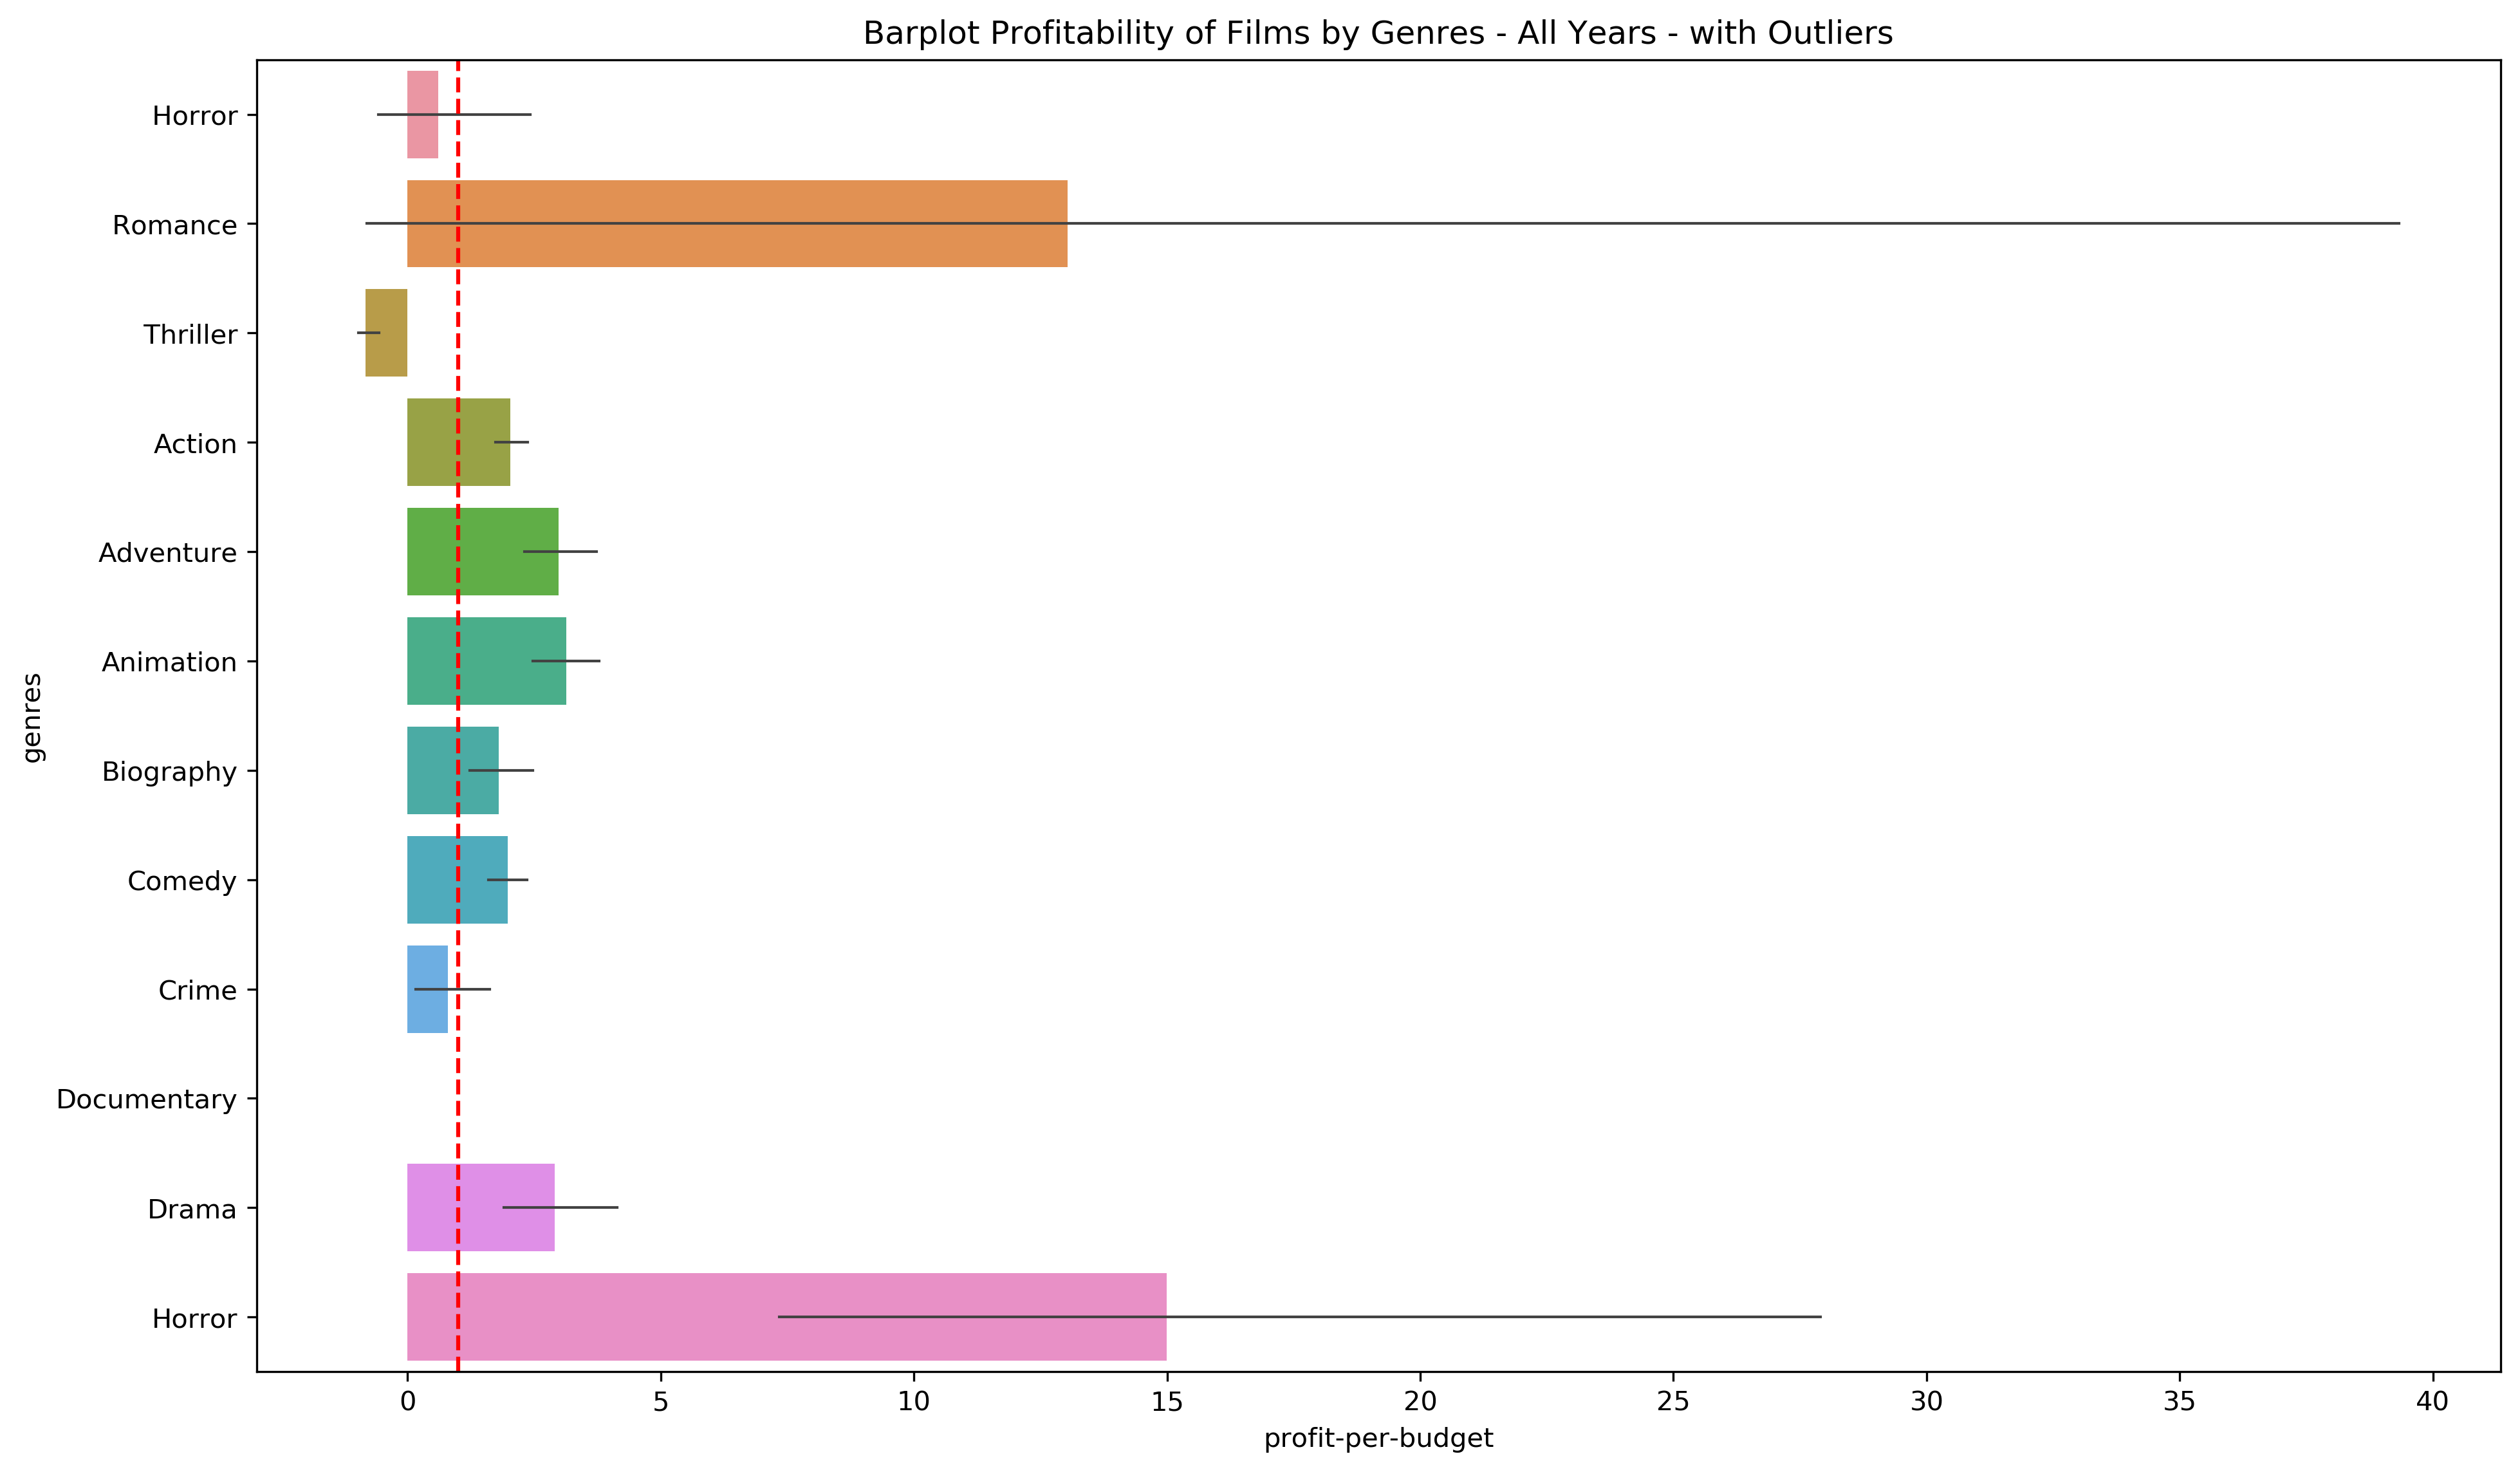

In [132]:
title = 'Barplot Profitability of Films by Genres - All Years - with Outliers'
get_plot(df_workexp_noduplicates, 'barplot', title, hue=False)

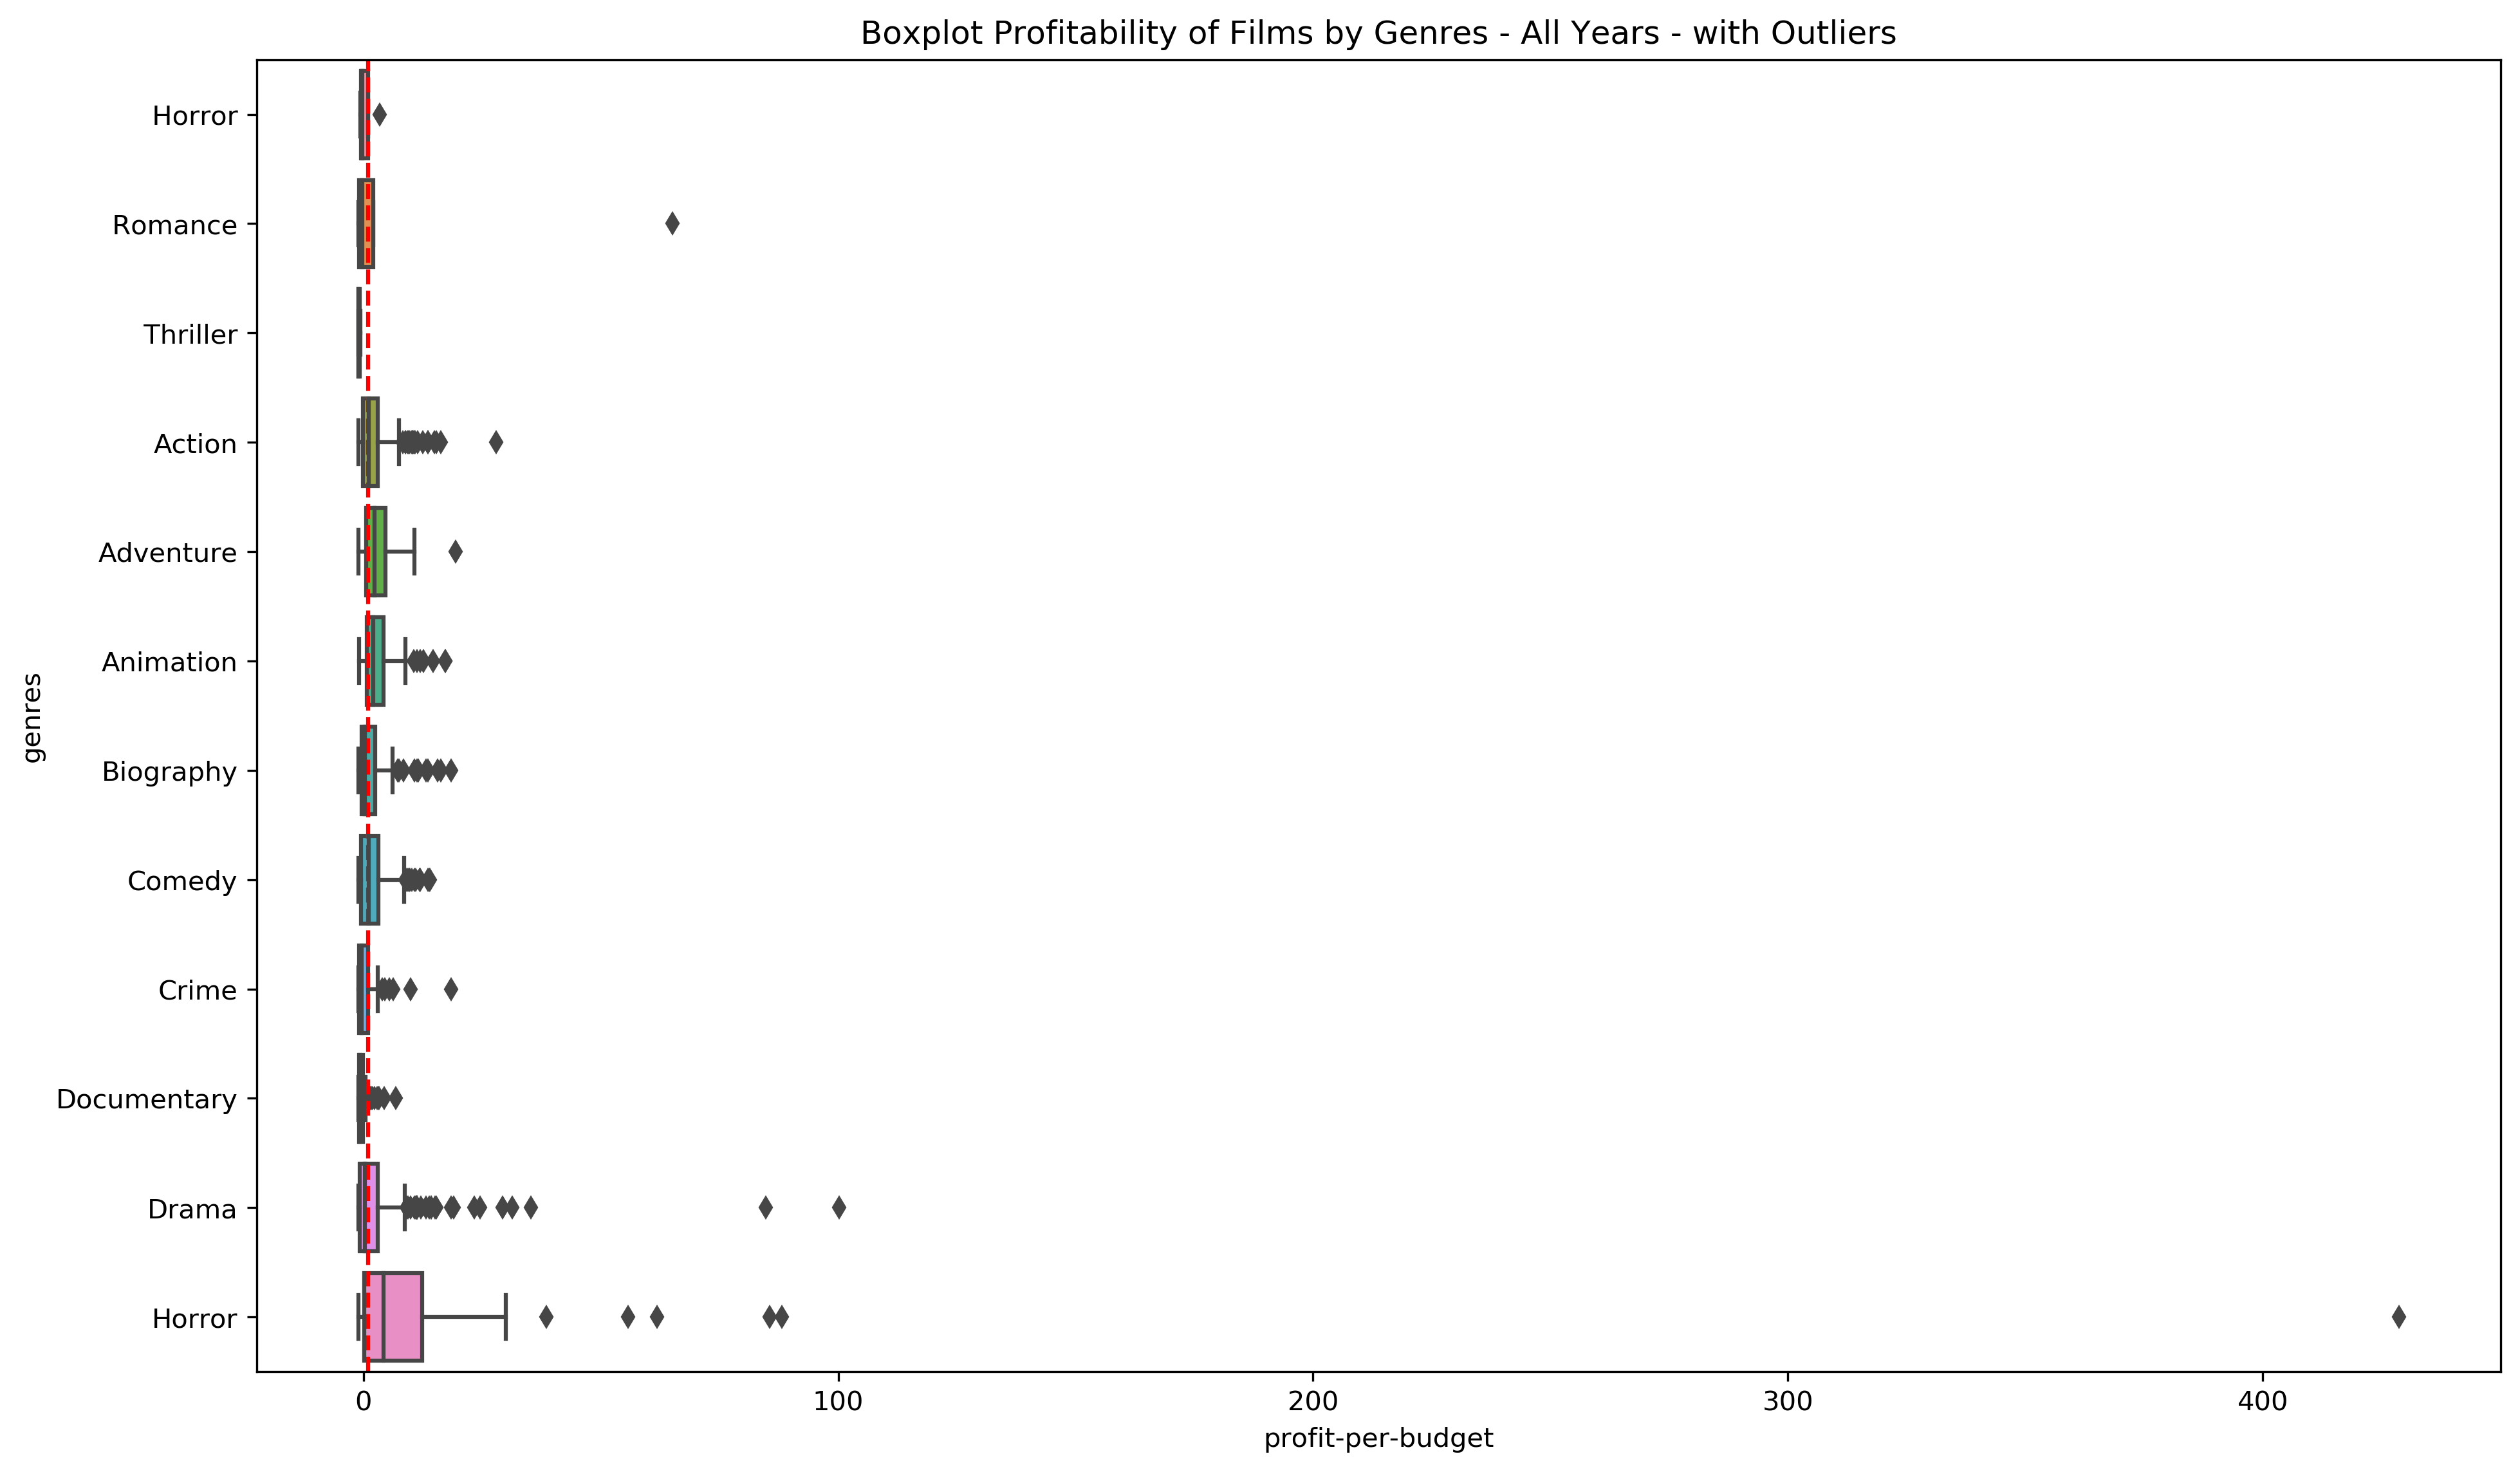

In [133]:
title = 'Boxplot Profitability of Films by Genres - All Years - with Outliers'
get_plot(df_workexp_noduplicates, 'boxplot', title, hue=False)

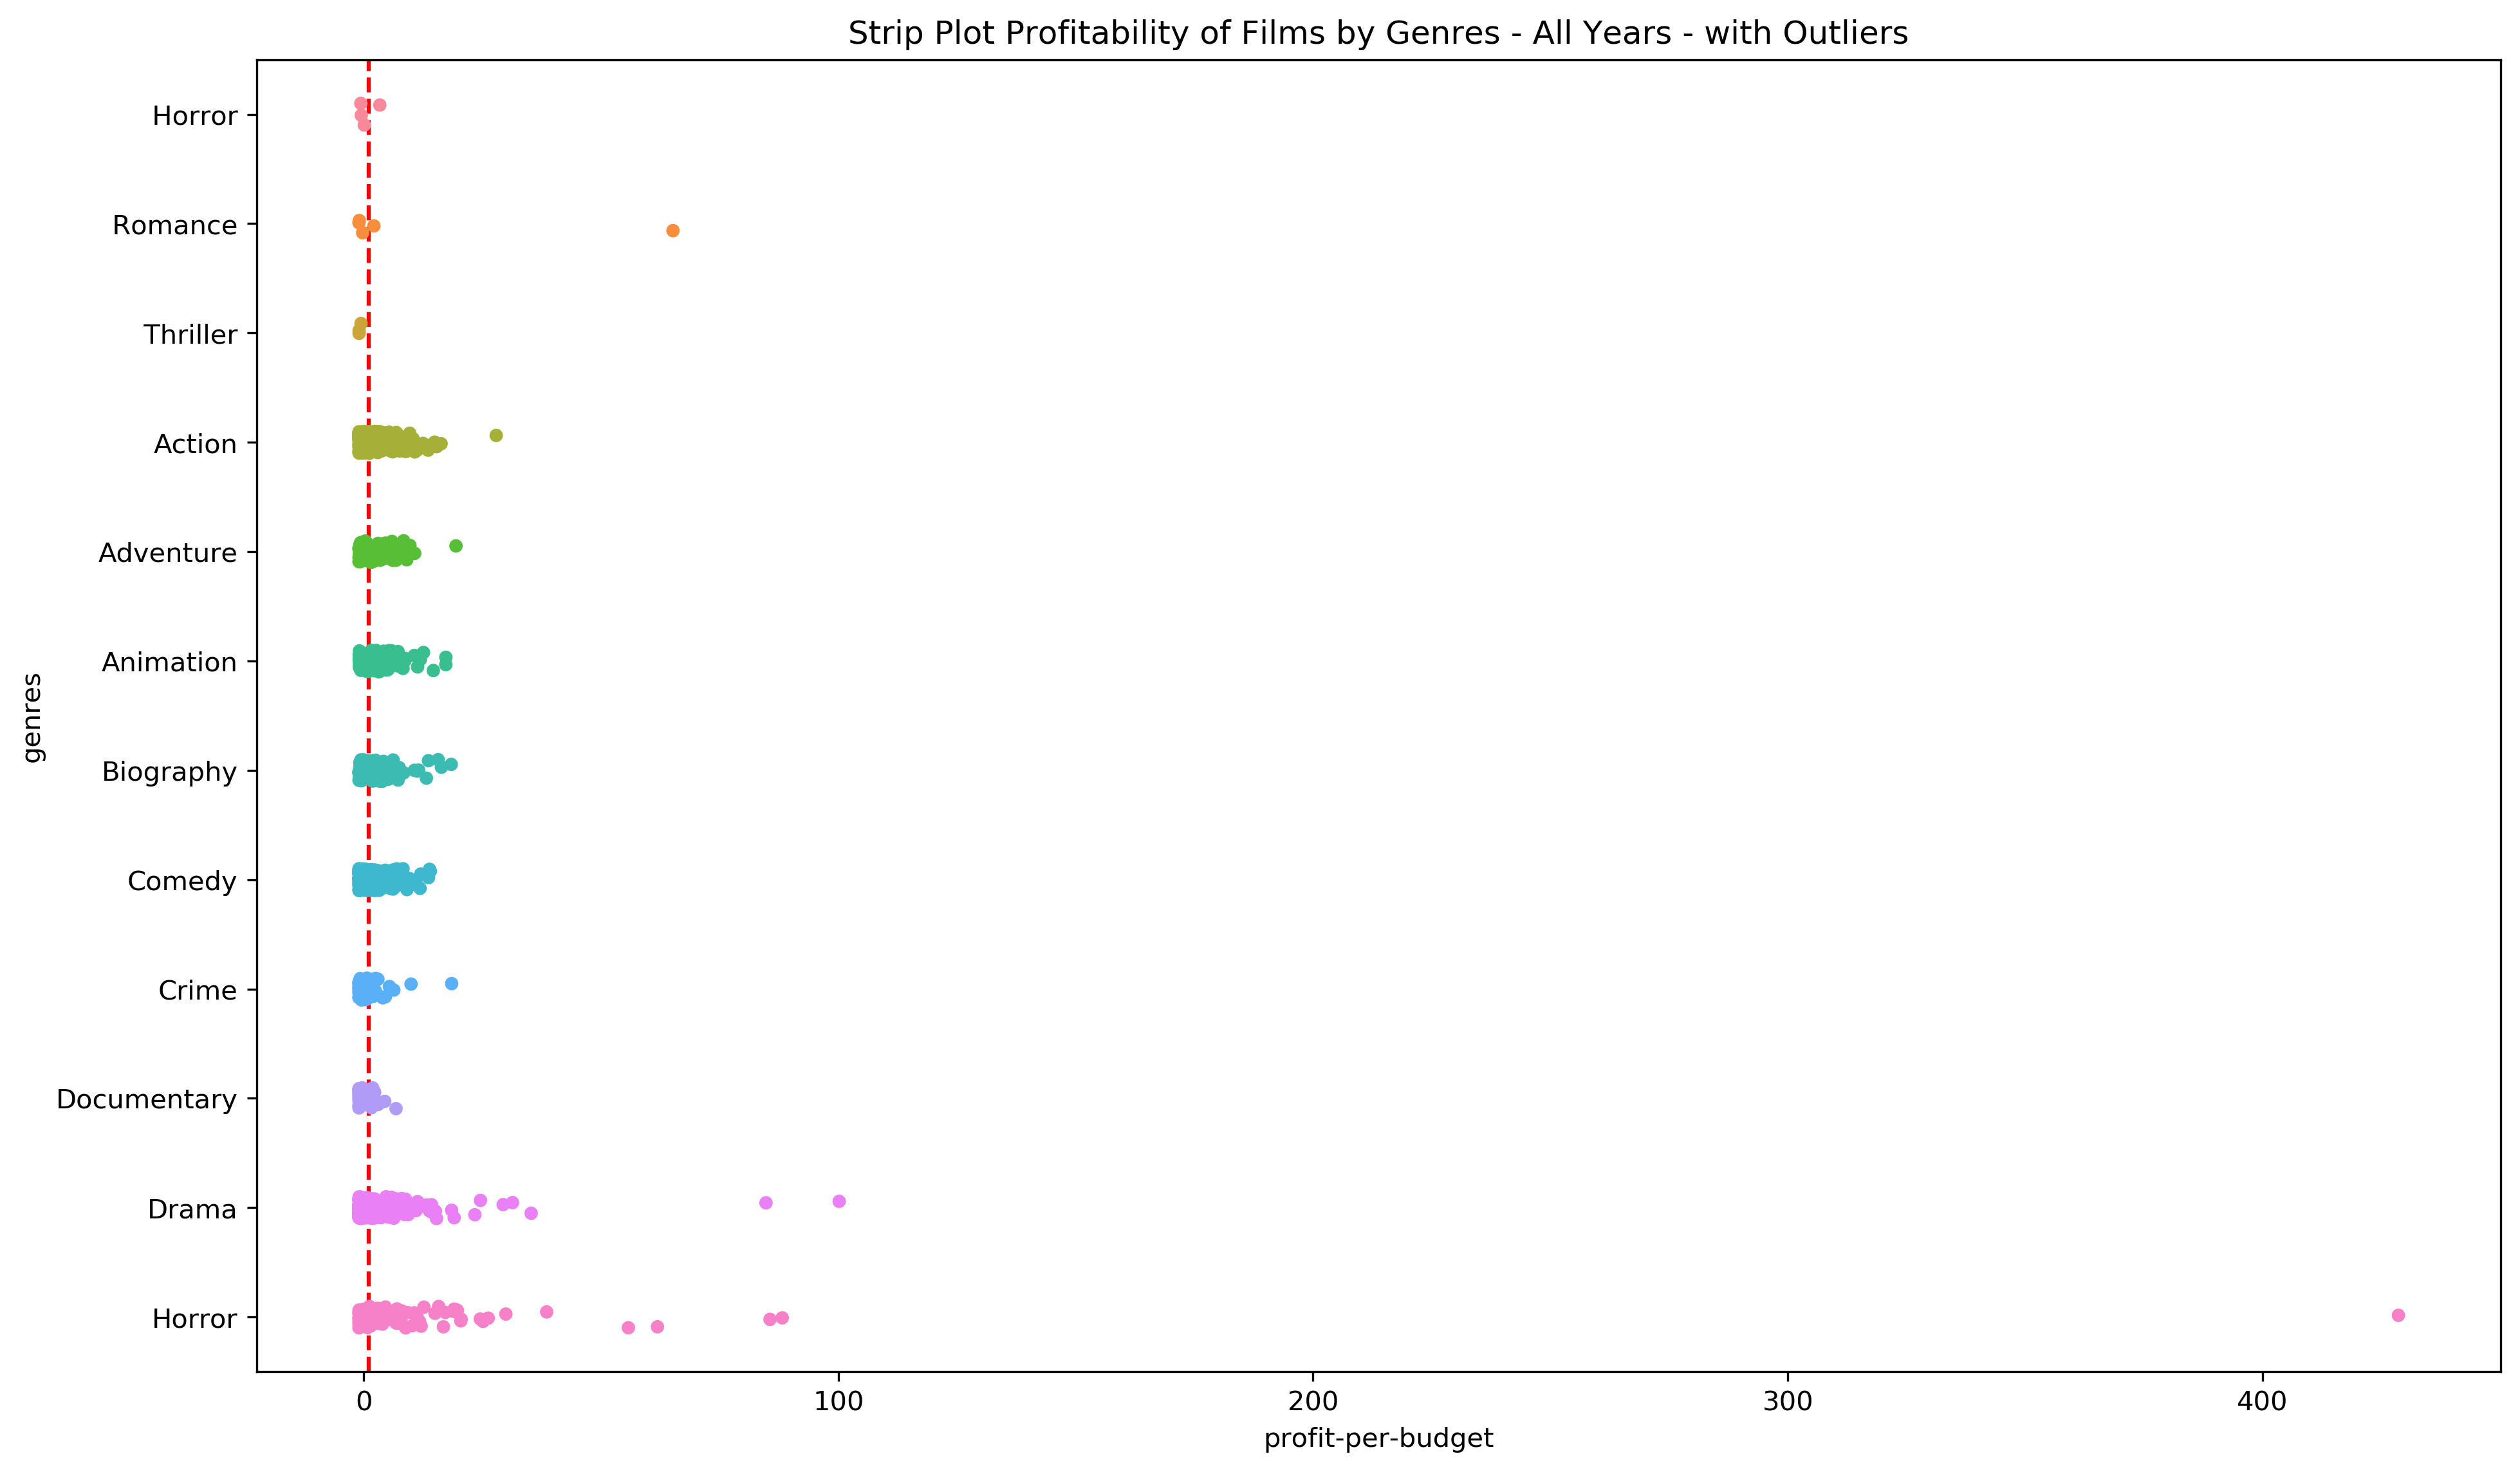

In [134]:
title = 'Strip Plot Profitability of Films by Genres - All Years - with Outliers'
get_plot(df_workexp_noduplicates, 'stripplot', title, hue=False)

###### Export to csv

In [136]:
df_workexp_noduplicates.to_csv('processed/single-genre-films-no-outliers')

#### Removing outliers

In [137]:
modified_zscore(df_workfull['profit-per-budget'])

(array([-7.34698672e-01, -7.90494377e-01, -7.54739500e-01, -3.21515053e-01,
        -5.45499336e-01,  6.31604367e+00, -4.86617844e-01, -7.73505328e-01,
         1.89870295e+00,  1.95301664e-01, -5.50538906e-01,  1.58418039e-01,
         1.60255683e+00,  2.38857716e-01,  4.86355186e-01, -7.47463762e-01,
        -5.52444899e-01, -7.39646695e-01,  3.06344555e+00,  6.41852759e+00,
         3.58799070e-01,  1.34149100e+00,  3.59306717e-01, -3.86835640e-01,
        -7.19761607e-01, -7.72279401e-01, -8.07722531e-01, -8.28125231e-01,
        -7.97694458e-01, -8.07722531e-01, -8.44116591e-02,  1.00075227e+01,
         3.14307680e+00,  2.44286531e-01,  1.94876502e+00, -7.21946180e-01,
        -4.02721527e-01,  4.73438649e-01, -6.78333846e-01, -7.31234206e-01,
        -7.96118153e-01, -7.85841377e-01, -8.12154983e-01, -7.20862632e-01,
        -7.81673484e-01, -8.17648482e-01, -7.78614365e-01, -8.32225076e-01,
         1.35231870e+01,  4.50974840e+00, -2.66134519e-01,  2.97250732e-01,
         3.4

In [138]:
#for two-genres dataframe
df_workfull['MAD'] = modified_zscore(df_workfull['profit-per-budget'])[0]

In [139]:
#for single-genre dataframe
df_workexp_noduplicates['MAD'] = modified_zscore(df_workexp_noduplicates['profit-per-budget'])[0]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [140]:
df_single_nooutliers = df_workexp_noduplicates[df_workexp_noduplicates['MAD'] < 3.5]

In [141]:
df_nooutliers = df_workfull.loc[df_workfull['MAD'] < 3.5, :]

Let's check now for:
- Two-genres dataframe `df_nooutliers`
- Single-genre dataframe `df_single_nooutliers`

if after removing the outliers there are genres with a number of observations (films) < 46:

In [142]:
df_nooutliers['genres'].value_counts()

Action  Adventure       156
Comedy  Drama           116
Biography  Drama         95
Animation  Adventure     66
Action  Crime            65
Drama                    60
Crime  Drama             56
Action  Drama            45
Name: genres, dtype: int64

In [143]:
df_single_nooutliers['genres'].value_counts()

Action         364
Drama          246
Comedy         242
Biography      125
Animation      101
Adventure       79
Crime           62
Documentary     61
Horror          57
 Horror          4
 Romance         4
 Thriller        3
Name: genres, dtype: int64

We need to filter `df_nooutliers` and `df_single_nooutliers` out from the genres with too few observations (< 46).

In [144]:
df_bygenre = df_nooutliers.groupby('genres').count()
filter_out = df_bygenre[df_bygenre['directors'] < 46].index

In [145]:
df_nooutliers = df_nooutliers[~df_nooutliers['genres'].isin(filter_out)]

In [146]:
df_bygenre = df_single_nooutliers.groupby('genres').count()
filter_out = df_bygenre[df_bygenre['directors'] < 46].index

In [147]:
df_single_nooutliers = df_single_nooutliers[~df_single_nooutliers['genres'].isin(filter_out)]

#### Prepare dataframes for best cast analysis

In [148]:
#split list of directors' names from each row
df_single_nooutliers['directors'] = df_single_nooutliers['directors'].apply(lambda x: x.split("'"))

In [149]:
#reset index
df_single_nooutliers.reset_index(inplace=True)

In [150]:
#drop column index
df_single_nooutliers.drop('index',axis=1,inplace=True)

In [151]:
#get directors names from each row
#Some rows have missing values for `directors` but not identifiable through .isna() (i.e. '[]' empty list)
for i in range(0,len(df_single_nooutliers)):
    try:
        df_single_nooutliers.loc[i,'directors'] = df_single_nooutliers['directors'][i][1]
    except:
        df_single_nooutliers.loc[i,'directors'] = None

In [152]:
#drop films without directors
df_single_nooutliers.dropna(subset=['directors'], inplace=True)

In [153]:
#reset index after dropping NaN values
df_single_nooutliers.reset_index(inplace=True)

In [154]:
#drop column index
df_single_nooutliers.drop('index',axis=1, inplace=True)

In [155]:
#split list of producers for each row
df_single_nooutliers['producers'] = df_single_nooutliers['producers'].apply(lambda x: x.split("'"))

In [156]:
#get names of producers for each row
df_single_nooutliers['producers'] = df_single_nooutliers['producers'].apply(lambda x: x[1::2])

In [157]:
#create a dataframe with producers .explode
df_single_prdcrs_exp = df_single_nooutliers.explode('producers')

In [158]:
#split and get writers list for each row
df_single_nooutliers['writers'] = df_single_nooutliers['writers'].apply(lambda x: x.split("'")[1::2])

In [159]:
#create a dataframe with writers .explode
df_single_wrtrs_exp = df_single_nooutliers.explode('writers')

In [160]:
#split list of actors names from each row
df_single_nooutliers['actors'] = df_single_nooutliers['actors'].apply(lambda x: x.split("'")[1::2])

In [161]:
#dataframe with .explode for each actor
df_single_actors_exp = df_single_nooutliers.explode('actors')

In [162]:
#check values, in case we have invalid data/mispelled data
df_single_prdcrs_exp['producers'].value_counts()

Peter Chernin        17
Jason Blum           16
]                    16
Tim Bevan            15
Eric Fellner         14
                     ..
Finn Gjerdrum         1
Gregory J. Bonann     1
Sandi Russell         1
David Alpert          1
Kenneth Branagh       1
Name: producers, Length: 2390, dtype: int64

In [163]:
#let's remove all the rows where 'producers' == ']' or ", "
df_single_prdcrs_exp = df_single_prdcrs_exp[~((df_single_prdcrs_exp['producers'] == ']') | (df_single_prdcrs_exp['producers'] == ", "))]

In [164]:
#check values, in case we have invalid data/mispelled data for directors
df_single_nooutliers['directors'].value_counts()

Robert Zemeckis     8
Hayao Miyazaki      6
Tyler Perry         6
Clint Eastwood      6
Steven Spielberg    5
                   ..
Hany Abu-Assad      1
Dylan Baker         1
Herschel Faber      1
Herbert Ross        1
David Yarovesky     1
Name: directors, Length: 1033, dtype: int64

In [165]:
#check values, in case we have invalid data/mispelled data for writers
df_single_wrtrs_exp['writers'].value_counts()

]                    11
,                    10
Stan Lee              8
Akiva Goldsman        8
Steven Knight         8
                     ..
Michael Wolfe         1
Caroline Thompson     1
Andrea Seigel         1
Simon Moore           1
James Mangold         1
Name: writers, Length: 2346, dtype: int64

In [166]:
#let's remove all the rows where 'writers' == ']' or ", "
df_single_wrtrs_exp = df_single_wrtrs_exp[~((df_single_wrtrs_exp['writers'] == ']') | (df_single_wrtrs_exp['writers'] == ", "))]

In [167]:
#check values, in case we have invalid data/mispelled data for actors
df_single_actors_exp['actors'].value_counts()

,                    460
]                    107
Liam Neeson           16
Tom Hanks             15
Anna Kendrick         14
                    ... 
Annet Mahendru         1
Chelsea Edmundson      1
Zinnia Vilce           1
Timothy Radford        1
Yô Ôizumi              1
Name: actors, Length: 8187, dtype: int64

In [168]:
#let's remove all the rows where 'actors' == ']' or ", " or "o", ""
df_single_actors_exp = df_single_actors_exp[~((df_single_actors_exp['actors'] == ']') | (df_single_actors_exp['actors'] == ", ") | (df_single_actors_exp['actors'] == 'o", '))]

#### Export to csv

In [171]:
df_single_nooutliers.to_csv('processed/single-genre-films-cleaned.csv')
df_nooutliers.to_csv('processed/two-genres-films-cleaned.csv')
df_single_prdcrs_exp.to_csv('processed/single-genre-producers.csv')
df_single_wrtrs_exp.to_csv('processed/single-genre-writers.csv')
df_single_actors_exp.to_csv('processed/single-genre-actors.csv')